# Alex Glover Final Project ML

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("dataset.csv")
aa=data[data['Class']==1]
bb=data[data['Class']==0]
bb=bb.sample(len(aa))
data=pd.concat([aa,bb])

#Exploratory data analysis 

#### Five top records of data

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


#### Five last records of data

In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269244,163605,-0.160496,1.256845,-0.899475,-0.624518,0.895734,-0.470561,0.698310,0.213935,-0.274470,...,0.367582,1.214398,-0.145360,0.145329,-0.627467,-0.213372,0.385507,0.262009,0.50,0
195153,130924,1.913405,-0.219302,-0.323525,1.586363,-0.450605,-0.264265,-0.282510,0.029287,1.282811,...,-0.525789,-1.257110,0.437008,-0.186600,-0.350527,-1.096402,0.051873,-0.031415,16.12,0
210450,137990,-0.784478,1.536835,0.641762,3.164121,1.072843,0.025662,0.890596,-0.199314,-1.157170,...,0.238133,0.938441,-0.051655,-0.003715,-0.775382,-0.032484,-0.038060,0.365154,1.93,0
76059,56379,1.155911,0.084122,-0.076377,1.020133,0.496676,0.826220,0.009914,0.168824,0.029459,...,-0.105568,-0.128207,-0.247596,-1.125203,0.796942,-0.261699,0.033308,-0.000625,33.40,0
90270,62947,-2.051763,-0.182023,-0.151912,1.187505,0.764709,0.016632,-0.626008,0.947385,-0.627035,...,0.163926,-0.001660,-0.595768,-1.291421,0.142912,-0.174269,-0.131539,-0.460168,60.00,0


#### Coloumns/features in data

In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Length of data

In [12]:
print('lenght of data is', len(data))

lenght of data is 984


#### Shape of data

In [13]:
data.shape

(984, 31)

#### Data information

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 541 to 90270
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    int64  
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22

#### Checking Null values / missing values

In [15]:
np.sum(data.isnull().any(axis=1))

0

#### Counts of missing values in each column

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Rows and columns in the dataset

In [17]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   31


In [18]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   984


#### Data Description

In [19]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88341.447154,-2.316730,1.829372,-3.497956,2.302885,-1.549543,-0.700802,-2.837026,0.271683,-1.262947,...,0.370419,-0.001494,-0.005146,-0.045502,0.030274,0.021396,0.081265,0.026778,92.705843,0.500000
std,47956.046240,5.557992,3.702428,6.222905,3.193828,4.239432,1.769702,5.837064,4.940399,2.336673,...,2.901184,1.190998,1.170239,0.556371,0.668161,0.466466,1.005322,0.415974,204.358803,0.500254
min,56.000000,-30.552380,-17.645813,-31.103685,-4.109529,-22.105532,-9.847370,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,0.000000
25%,48107.250000,-2.910126,-0.114152,-5.084967,0.025955,-1.870746,-1.571771,-3.103817,-0.200009,-2.298358,...,-0.175511,-0.521657,-0.221742,-0.387121,-0.296867,-0.298775,-0.062555,-0.064796,1.180000,0.000000
50%,80204.000000,-0.673712,0.965610,-1.342324,1.303429,-0.393182,-0.657255,-0.675931,0.141523,-0.653058,...,0.142661,0.014607,-0.031099,0.005434,0.066199,-0.019892,0.042506,0.026694,17.990000,0.500000
75%,134368.500000,1.147470,2.814266,0.344505,4.235631,0.484630,0.037862,0.227395,0.853411,0.179194,...,0.636615,0.565944,0.190499,0.381696,0.407705,0.322036,0.452145,0.209127,92.570000,1.000000
max,172607.000000,2.354104,22.057729,3.759214,12.114672,16.625394,6.474115,5.802537,20.007208,5.901320,...,27.202839,8.361985,5.466230,1.214964,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


### Taking Input and and output

In [20]:
X=data.drop(columns=['Class'])
y=data['Class']

### Original data dimension

In [21]:
X.shape

(984, 30)

### Scalling the Values of Features

In [22]:
X= MinMaxScaler().fit_transform(X)

#PCA Dimension Reduction

### PCA

In [24]:
PCA_ = PCA(n_components=20)
PCA_X = PCA_.fit_transform(X)

### Data Dimensions now

In [25]:
PCA_X.shape

(984, 20)

In [26]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(PCA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [27]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [28]:
y_pred = Ran_For.predict(X_test)
rn1=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.90647


### ROC CURVE

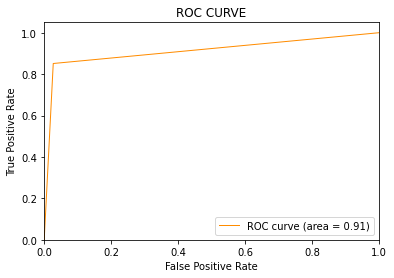

In [29]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##LDA Dimension Reduction

### LDA

In [30]:
LDA_=LinearDiscriminantAnalysis(n_components=1)
LDA_X = LDA_.fit_transform(X,y)

### Data Dimensions now

In [31]:
LDA_X.shape

(984, 1)

In [32]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(LDA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [33]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [34]:
y_pred = Ran_For.predict(X_test)
rn2=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.95833


### ROC CURVE

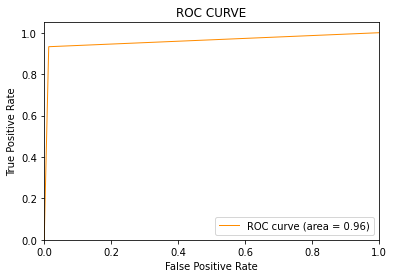

In [35]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##TSNE Dimension Reduction

### TSNE

In [39]:
TSNE_=X_TSNE = TSNE(n_components=3)
TSNE_X = TSNE_.fit_transform(X)
TSNE_X

array([[-2.9301772, -4.0057454, -9.811724 ],
       [-9.010205 , 21.639673 , -4.583249 ],
       [-4.1924863, -4.913397 , -7.160628 ],
       ...,
       [ 1.9664184,  3.0578558, 17.478067 ],
       [ 5.9012275, 15.232837 ,  0.9673692],
       [ 6.2643266, 11.546442 , -2.62179  ]], dtype=float32)

### Data Dimensions now

In [40]:
TSNE_X.shape

(984, 3)

In [41]:
#split of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(LDA_X, y, test_size=0.30, random_state=2)

# Random Forest

In [42]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=2)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=2, random_state=11)

In [43]:
y_pred = Ran_For.predict(X_test)
rn3=f1_score(y_test, y_pred)
print('F1 score= {:.5f}'.format(f1_score(y_test, y_pred)))

F1 score= 0.95833


### ROC CURVE

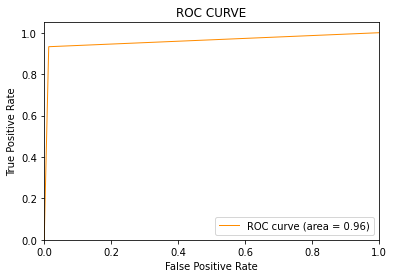

In [44]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Comparison of all algorithms Results

In [45]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["PCA Based score", round(rn1,4)])
x.add_row(["LDA Based score", round(rn2,4)])
x.add_row(["TSNE Based score", round(rn3,4)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------+----------+
|      Model       | Accuracy |
+------------------+----------+
| PCA Based score  |  0.9065  |
| LDA Based score  |  0.9583  |
| TSNE Based score |  0.9583  |
+------------------+----------+




# ROC Curve for Models

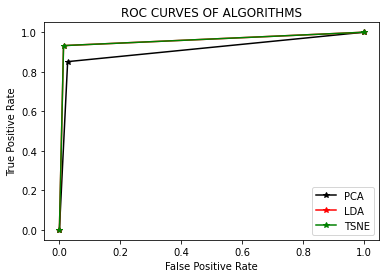

In [46]:
plt.plot(fpr1, tpr1, marker='*', label='PCA', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='LDA', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='TSNE', color = 'green')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

# I applied three dimension reduction techniques. LDA and TSNE based dimension reduction techniques performed well but the training time TSNE is more reliable in this case. In my case, I learned that the LDA is the better and fast method for dimensionalty reduction. PCA was the least reliable model under the three techniques for my dataset. Thank you for such a great year!

##Project Writeup

Requirements and Why I chose this option:

Exploring Feature Space and Dimensionality Reduction - Do you need all the predictor
variables/features you currently have? For some data set, explore how 2 - 3 dimensionality
reduction techniques compare with each other... I chose this option because being new to ML, I had never previously learned about dimensionality reduction. Since this was a fresh topic to me, I thought it would be fun to have a fresh start.

How did I begin the project:

I began the project by first researching dimensionality reduction. I learned that essentially dimensionality reduction is used to reduce attributes of a dataset while keeping as much of the variation as possible. I then started to brainstorm and research different dimensionality reduction techniques to figure out which ones I wanted to use. Essentially, I chose LDA, TSNE, and PCA. PCA and LDA are linear methods and TSNE is a non-linear method. PCA turns a dataset of correlated variables into a dataset of a smaller number of uncorrelated variables while trying to maintain the greatest amount of variation within the dataset. LDA does something similar as PCA, but instead of using uncorrelated variables such as PCA, LDA finds a linear combination of input features that optimizes class separability. LDA also accounts for class labels while PCA does not. TSNE on the other hand is used more for data visualization. 

My Dataset:

I recieved my dataset from Kaggle. The link to this is:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
The dataset contains credit card transactions made in September 2013 by European card holders. It contains only numerical input values. This is high-dimensional data which is why I chose to use it to perform my dimensionality reduction techniques. I needed to project the data into a lower-dimensional subspace.


Details on my Implementation: 
I wrote in it Markdown above and I also write down Headers to take you through each step of my implementation. I hope you enjoy and thank you for teaching me so much this year when it was my first course in machine learning!



